# Predict Product Category from Invoice

Organizations around the world purchase goods & services from their suppliers via Purchase Order-Invoice exchange. Organizations raise Purchase Order for specific item and expected price. Suppliers then raise an Invoice to the organization for billing. As part of process streamlining, organizations catalogue items, i.e., they document all the item details in their procurement system. However in many cases organizations are required to purchase non-catalogued items.

For any kind of analysis of spend data, it is important that all invoices be classified to specific “Product Category”, defined by a standard taxonomy that the organization follows.
Example, an invoice having an item description of “Mobile Bills” may be classified into “Telecom” product category.

**Problem Statement**

Attached is the data for analysis of expenditures based on Invoices received. We need to innovate a high accuracy classification system to predict ‘Product Category’, given invoice information.

We need to submit our results in a .csv file (2446x2) matching following format:

Inv_Id,Product_Category<br>
1,CLASS-784<br>
2,CLASS-784<br>
3,CLASS-784<br>
4,CLASS-784<br>
5,CLASS-784<br>
6,CLASS-784


## 1. Getting Started

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("E:/Data Science/Hackerearth")

In [2]:
# Importing the dataset
Train = pd.read_csv("./Input/Dataset/Train.csv")
Test = pd.read_csv("./Input/Dataset/Test.csv")

## 2. Understanding the data

In [3]:
# Shape of data
print("Number of rows and columns in train dataset:",Train.shape)
print("Number of rows and columns in test dataset:",Test.shape)

Number of rows and columns in train dataset: (5566, 6)
Number of rows and columns in test dataset: (2446, 5)


In [4]:
# Variable structure
print("-----------------Variable Structure of training data--------------")
Train.info()
print("-----------------Variable Structure of test data------------------")
Test.info()

-----------------Variable Structure of training data--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 6 columns):
Inv_Id              5566 non-null int64
Vendor_Code         5566 non-null object
GL_Code             5566 non-null object
Inv_Amt             5566 non-null float64
Item_Description    5566 non-null object
Product_Category    5566 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 261.0+ KB
-----------------Variable Structure of test data------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 5 columns):
Inv_Id              2446 non-null int64
Vendor_Code         2446 non-null object
GL_Code             2446 non-null object
Inv_Amt             2446 non-null float64
Item_Description    2446 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 95.6+ KB


 + There are 2 numeric variables **Inv_Id** and **Inv_Amt**whereas rest 4 variables **Vendor_Code**, **GL_code**, **Item_Description** and **Product_Category**are categorical in nature.
 + At first glance, it appears that **Inv_Id**, **Vendor_Code**, **GL_Code** are identifier only. At first, we are not considering these variable for Machine Learning.
 + **Inv_Amt** may throw some useful insights. We may incorporate this variable in later stage of model buidling.
 + **Product_Category** is key variable on which we have to perform NLP and create a classification model.

> No missing value has been observed in this data.

Let's reconfirm missing value in another step as well.

In [5]:
print("Missing value in Train data:", Train.isnull().sum().sum())
print("Missing value in Test data:", Test.isnull().sum().sum())

Missing value in Train data: 0
Missing value in Test data: 0


> It got confirmed that this dataset does not contain any missing value.

Let's look at top 5 rows of train and test dataset:

In [6]:
# Top 5 rows
Train.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [7]:
Test.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...


Now, let's look at distribution of Product_Category:

In [8]:
# Checking distribution of Product_Category
print("The unique number of Product Categories: ",len(Train['Product_Category'].unique()))
print("Below are the distribution of each categories in Train data:")
Train['Product_Category'].value_counts(normalize = True)

The unique number of Product Categories:  36
Below are the distribution of each categories in Train data:


CLASS-1758    0.269134
CLASS-1274    0.177147
CLASS-1522    0.152893
CLASS-1250    0.081028
CLASS-1376    0.065577
CLASS-1963    0.041322
CLASS-1249    0.031621
CLASS-1828    0.020302
CLASS-2141    0.019404
CLASS-1721    0.019224
CLASS-1567    0.015092
CLASS-1919    0.012576
CLASS-1850    0.010780
CLASS-2112    0.009522
CLASS-1477    0.008983
CLASS-2241    0.006468
CLASS-1870    0.006468
CLASS-1309    0.005749
CLASS-1429    0.005749
CLASS-2003    0.005749
CLASS-1322    0.005031
CLASS-1964    0.005031
CLASS-1294    0.004492
CLASS-1770    0.003414
CLASS-1983    0.003054
CLASS-1867    0.002695
CLASS-1652    0.002695
CLASS-2038    0.002336
CLASS-1805    0.002156
CLASS-2152    0.001617
CLASS-1248    0.000898
CLASS-1688    0.000719
CLASS-2146    0.000359
CLASS-2015    0.000359
CLASS-1838    0.000180
CLASS-1957    0.000180
Name: Product_Category, dtype: float64

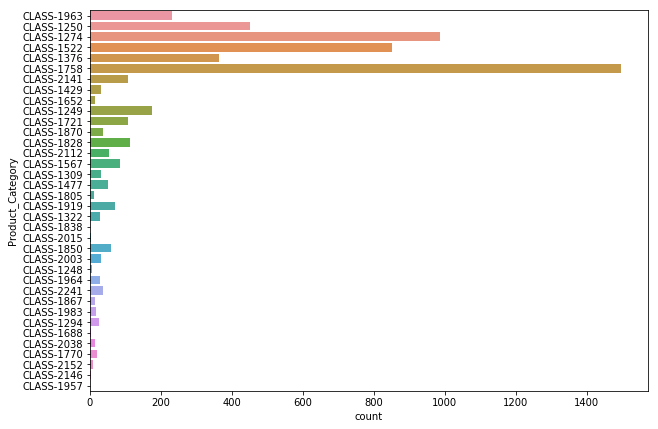

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(y = 'Product_Category', data = Train);

> It is clearly visible from above analysis that we are dealing with **unbalanced classification** problem where out of 30 product categories, only 5 are having > 5% occurance. We need to note here that predicting rare categories will be challenging due to insufficient data points.

## 3. Data Preprocessing

Let's preprocess our data for building classification model. As we already discussed above that our main variable of interest is **Item_Description**. On this variable, we are going to apply various NLP techniques.

### 3.1 Making lowercase

At first, we will convert all words in **Item_Description** as lowercase. This is generally a good idea as many text classification tools rely on counting the occurrences of words. If both upper and lower case versions of the same word are found in the text then the algorithm will count them as different words even though the meaning is the same. 

In [10]:
# Making lowercase
Train['Item_Description_tidy'] = Train['Item_Description'].str.lower()
Train.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,Item_Description_tidy
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,artworking/typesetting production jun 2009 cha...
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,auto leasing corporate services corning inc /n...
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,store management lease/rent deltona corp real ...
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,store construction general requirements coloni...
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,jul 2015 aydin corp contingent labor/temp labo...


### 3.2 Removing Punctuations, Numbers, and Special Characters

Since punctuations, numbers and special characters do not help much, It is better to remove them from the tweet. Here we will replace everything except characters and hashtags with spaces.

In [11]:
# remove special characters, numbers, punctuations
Train['Item_Description_tidy'] = Train['Item_Description_tidy'].str.replace("[^a-zA-Z#]", " ")
Train.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,Item_Description_tidy
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,artworking typesetting production jun cha...
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,auto leasing corporate services corning inc n...
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,store management lease rent deltona corp real ...
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,store construction general requirements coloni...
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,jul aydin corp contingent labor temp labo...


### 3.3 Removing Short Words

In this step, we are removing all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them. Howerver, in this case it may not require as text contains details of product which may be useful.

In [12]:
# removing short words
Train['Item_Description_tidy'] = Train['Item_Description_tidy'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
Train.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,Item_Description_tidy
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,artworking typesetting production champion par...
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,auto leasing corporate services corning auto l...
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,store management lease rent deltona corp real ...
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,store construction general requirements coloni...
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,aydin corp contingent labor temp labor conting...


### 3.4 Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [13]:
tokenized_tweet = Train['Item_Description_tidy'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [artworking, typesetting, production, champion...
1    [auto, leasing, corporate, services, corning, ...
2    [store, management, lease, rent, deltona, corp...
3    [store, construction, general, requirements, c...
4    [aydin, corp, contingent, labor, temp, labor, ...
Name: Item_Description_tidy, dtype: object

### 3.5 Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_tweet.head()

0    [artwork, typeset, product, champion, part, sm...
1    [auto, leas, corpor, servic, corn, auto, leas,...
2    [store, manag, leas, rent, deltona, corp, real...
3    [store, construct, gener, requir, coloni, trus...
4    [aydin, corp, conting, labor, temp, labor, con...
Name: Item_Description_tidy, dtype: object

Now let’s stitch these tokens back together.

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

Train['Item_Description_tidy'] = tokenized_tweet
Train.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,Item_Description_tidy
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,artwork typeset product champion part smap pro...
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,auto leas corpor servic corn auto leas mainten...
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,store manag leas rent deltona corp real estat ...
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,store construct gener requir coloni trust gene...
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,aydin corp conting labor temp labor conting la...


### 3.6 Collecting all preprocessing steps in one function

Let's create a function for all above steps so that it can be reusable with minimum time of coding.

In [16]:
# Creating function for preprocessing
def clean_and_tokenize_tweets(data):
  # Making lowercase
  data['Item_Description_tidy'] = data['Item_Description'].str.lower()
  
  # remove special characters, numbers, punctuations
  data['Item_Description_tidy'] = data['Item_Description_tidy'].str.replace("[^a-zA-Z#]", " ")
  
  # removing short words
  # data['Item_Description_tidy'] = data['Item_Description_tidy'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
  
  # Tokenize the words for it to use
  tokenized_tweet = data['Item_Description_tidy'].apply(lambda x: x.split())
  
  # Stem the words. (Stemming is a rule-based process of stripping
  # the suffixes (“ing”, “ly”, “es”, “s” etc) from a word)
  stemmer = PorterStemmer()
  tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
  
  for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
  
  data['Item_Description_tidy'] = tokenized_tweet
  return data


In [17]:
# Applying Preprocessing function on Training data
Train_data = clean_and_tokenize_tweets(Train)
Train_data.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,Item_Description_tidy
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,artwork typeset product jun champion part inc ...
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,auto leas corpor servic corn inc ny mar auto l...
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,store manag leas rent deltona corp real estat ...
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,store construct gener requir coloni trust iii ...
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,jul aydin corp conting labor temp labor contin...


In [18]:
# Applying Preprocessing function on Test data
Test_data = clean_and_tokenize_tweets(Test)
Test_data.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Item_Description_tidy
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...,travel and entertain miscellan compani car fie...
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...,final site clean up store construct advanc mic...
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...,arabian american develop co final site clean u...
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...,corpor servic conting labor temp labor human r...
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...,fortun nation corp miscellan compani car field...


## 4. Building a Classifier

After cleanup, it is time to build the classifier to identify Product Categories. At first, we are dividing our data into train and test set.

### 4.1 Dividing data into train and validation set

Before training the model, let's split the training data into a training and validation set.



In [19]:
# Dividing data into train and validation set
from sklearn.model_selection import train_test_split

validation_percent = 0.30
seed = 786

X_train, X_validation, y_train, y_validation = train_test_split(Train_data['Item_Description_tidy'], Train_data['Product_Category'], test_size = validation_percent, random_state = seed)

### 4.2 Training

 In the training stage, we are creating a pipeline with following two steps:
 
  1. Extracting Features from Cleaned Tweets using TF-IDF
  2. Building classifier
  


#### 4.2.1. Extracting Features from Cleaned Tweets

To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings. Here, we are using TF-IDF.

**TF-IDF Features**

This is another method which is based on the frequency method but it is different to the **bag-of-words** approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

 + TF = (Number of times term t appears in a document)/(Number of terms in the document)
 + IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
 + TF-IDF = TF*IDF

#### 4.2.2 Building classifier

We are starting with simple models and then we will proceed with more complex models. Below are the schematic of our classifier training:

**Classifier tested**: We are testing below classifier in this problem:

 1. Multinomial Logistic regression classifier
 2. Multinomial Naive Bayes classifier
 3. Stochastic gradient descent classifier


**Validation scheme**: We are using below method of validating our classifier

 1. External validation: hold-out sample data
 2. Internal validation: 10-Fold cross validation
 
 **Validation metric:** We are testing performance of model based on **F1 Score** metric. Below is the short detail on **F1 Score**:
 
 To understand **F1 Score**, let's understand two more metric in detail which are **Precision** and **Recall**. Below are the formula for the same.
 
 $Precision: \frac{True Positive}{True Positive + False Positive}$
 
 $Recall: \frac{True Positive}{True Positive + False Negative}$
 
 <br>
 <br>
 
 Hence, **F1 Score** can be defined as
 
 $Recall: \frac{2*Precision * Recall}{Precision + Recall} $



#### 4.2.1.1 Logistic Regression

We are using **Pipeline** from **`sklearn`** library to stich both preprocessing of text data and classifier testing. 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

seed = 786

pipeline_LR = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('LR', LogisticRegression(random_state=seed, solver='lbfgs',multi_class='multinomial')),
])

In [21]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [22]:
# Fitting Logistic Regression model
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score

model_LR = pipeline_LR.fit(X_train, y_train)

# Scoring based on F1 score for hold out sample
y_predict_LR = model_LR.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_LR, average="macro")
print(classification_report(y_validation, y_predict_LR))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_LR, X_train, y_train, cv=10, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

  CLASS-1248       0.00      0.00      0.00         4
  CLASS-1249       1.00      1.00      1.00        54
  CLASS-1250       1.00      1.00      1.00       137
  CLASS-1274       0.98      1.00      0.99       283
  CLASS-1294       1.00      1.00      1.00        10
  CLASS-1309       1.00      1.00      1.00         7
  CLASS-1322       1.00      1.00      1.00         9
  CLASS-1376       1.00      1.00      1.00        99
  CLASS-1429       1.00      1.00      1.00        10
  CLASS-1477       1.00      1.00      1.00        19
  CLASS-1522       1.00      1.00      1.00       244
  CLASS-1567       1.00      1.00      1.00        23
  CLASS-1652       1.00      1.00      1.00         3
  CLASS-1688       0.00      0.00      0.00         3
  CLASS-1721       0.78      1.00      0.88        32
  CLASS-1758       1.00      1.00      1.00       460
  CLASS-1770       1.00      1.00      1.00         6
  CLASS-1805       0.00    

#### 4.2.1.2 Naive Bayes

In [23]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [24]:
from sklearn.naive_bayes import MultinomialNB
pipeline_NB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('to_dense', DenseTransformer()),
    ('NB', MultinomialNB()),
])

In [25]:
# Fitting Naive Bayes model
model_NB = pipeline_NB.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_NB = model_NB.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_NB, average="macro")
print(classification_report(y_validation, y_predict_NB))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_NB, X_train, y_train, cv=10, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

  CLASS-1248       0.00      0.00      0.00         4
  CLASS-1249       1.00      0.98      0.99        54
  CLASS-1250       0.97      1.00      0.99       137
  CLASS-1274       0.97      1.00      0.99       283
  CLASS-1294       1.00      0.80      0.89        10
  CLASS-1309       0.00      0.00      0.00         7
  CLASS-1322       1.00      1.00      1.00         9
  CLASS-1376       0.95      1.00      0.98        99
  CLASS-1429       1.00      0.90      0.95        10
  CLASS-1477       1.00      1.00      1.00        19
  CLASS-1522       0.98      1.00      0.99       244
  CLASS-1567       0.92      1.00      0.96        23
  CLASS-1652       0.00      0.00      0.00         3
  CLASS-1688       0.00      0.00      0.00         3
  CLASS-1721       0.67      1.00      0.80        32
  CLASS-1758       0.99      1.00      1.00       460
  CLASS-1770       0.00      0.00      0.00         6
  CLASS-1805       0.00    

#### 4.2.1.3 Stochastic gradient descent

In [26]:
# Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
seed = 786

pipeline_SGD = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('SGD', SGDClassifier(random_state=seed)),
])

model_SGD = pipeline_SGD.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_SGD = model_SGD.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_SGD, average="macro")
print(classification_report(y_validation, y_predict_SGD))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_SGD, X_train, y_train, cv=10, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

  CLASS-1248       1.00      1.00      1.00         4
  CLASS-1249       1.00      1.00      1.00        54
  CLASS-1250       1.00      1.00      1.00       137
  CLASS-1274       1.00      1.00      1.00       283
  CLASS-1294       1.00      1.00      1.00        10
  CLASS-1309       1.00      1.00      1.00         7
  CLASS-1322       0.82      1.00      0.90         9
  CLASS-1376       1.00      1.00      1.00        99
  CLASS-1429       1.00      1.00      1.00        10
  CLASS-1477       1.00      1.00      1.00        19
  CLASS-1522       1.00      1.00      1.00       244
  CLASS-1567       1.00      1.00      1.00        23
  CLASS-1652       1.00      1.00      1.00         3
  CLASS-1688       1.00      1.00      1.00         3
  CLASS-1721       1.00      1.00      1.00        32
  CLASS-1758       1.00      1.00      1.00       460
  CLASS-1770       1.00      1.00      1.00         6
  CLASS-1805       1.00    

> Out of above 3 method tested, **SGD classifier** performs better compare to other methods.

## 5. Predicting Output

Let's predict Product category based on above finalized classifier.

In [27]:
# Predicting the output
Test_data['y_predict_SGD'] = model_SGD.predict(Test_data['Item_Description_tidy'])
Submission = Test_data[['Inv_Id','y_predict_SGD']]
Submission = Submission.rename(columns = {'y_predict_SGD':'Product_Category'})
Submission.head(5)

,Inv_Id,Product_Category
0,15003,CLASS-1758
1,15008,CLASS-1522
2,15013,CLASS-1522
3,15019,CLASS-1376
4,15020,CLASS-1758


In [28]:
# Exporting output
Submission.to_csv("./Output/Output_v2.csv",index = False)